In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_irrigated_land_area")

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
table = soup.find_all('table', class_="wikitable sortable static-row-numbers sort-under")[0]

In [5]:
data = []
for info in table.find_all_next('tr'):
    items = info.text.split('\n')
    items_filtered = list(filter(lambda item: item != "", items))
    if len(items_filtered) < 2:
        break
    items_filtered = items_filtered[0:2]
    items_filtered[0] = items_filtered[0].replace('\xa0', '')
    items_filtered[1] = items_filtered[1].replace(',', '')
    data.append(items_filtered)

In [6]:
head = data[0]
head

['Country/Territory/Region', 'Irrigated land (km2)']

In [8]:
for item in data[1:]:
    try:
        item[1] = float(item[1])
    except:
        item[1] = np.nan

In [9]:
df = pd.DataFrame(data[1:], columns=head)

In [10]:
df

,Country/Territory/Region,Irrigated land (km2)
0,World,3242917.0
1,Afghanistan,24930.0
2,Albania,1820.0
3,Algeria,12605.0
4,American Samoa,0.0
...,...,...
230,Wallis and Futuna,0.6
231,West Bank and Gaza Strip,151.0
232,Yemen,6800.0
233,Zambia,1560.0


In [12]:
filtered_df = df[df["Irrigated land (km2)"].isna() == False].copy()

In [13]:
filtered_df["% of World"] = 100*filtered_df["Irrigated land (km2)"]/filtered_df.iloc[0,1]

In [14]:
filtered_df

,Country/Territory/Region,Irrigated land (km2),% of World
0,World,3242917.0,100.000000
1,Afghanistan,24930.0,0.768752
2,Albania,1820.0,0.056122
3,Algeria,12605.0,0.388693
4,American Samoa,0.0,0.000000
...,...,...,...
230,Wallis and Futuna,0.6,0.000019
231,West Bank and Gaza Strip,151.0,0.004656
232,Yemen,6800.0,0.209688
233,Zambia,1560.0,0.048105


In [16]:
sorted_df = filtered_df.sort_values(by=["% of World"], ascending=False) 

<Axes: xlabel='Country/Territory/Region', ylabel='Irrigated land (km2)'>

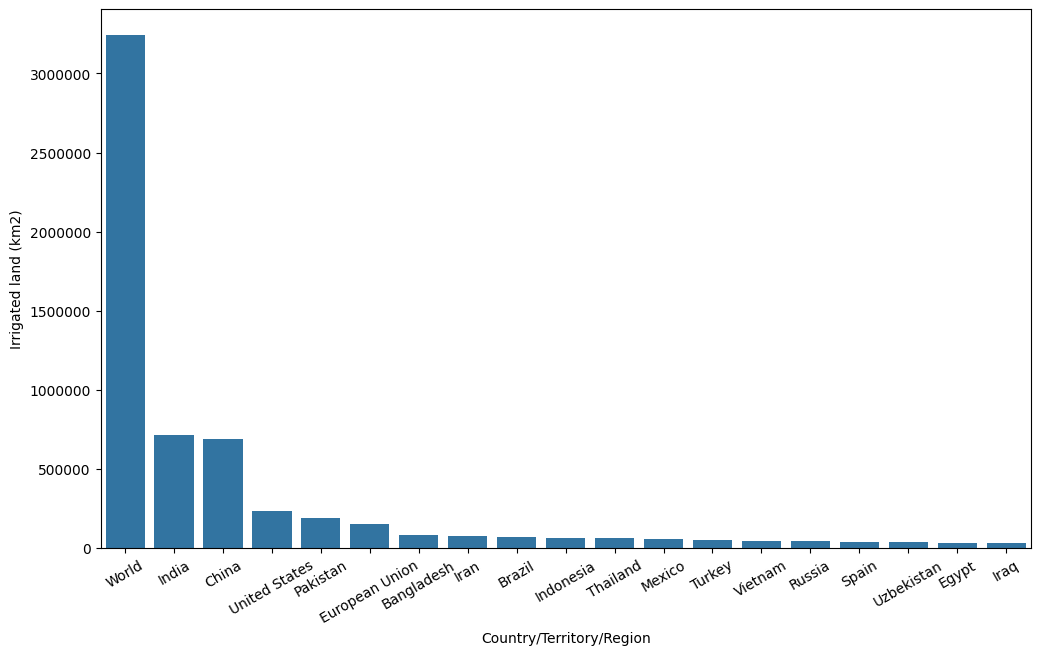

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain')
sns.barplot(sorted_df[sorted_df["% of World"] > 1.0], x="Country/Territory/Region", y="Irrigated land (km2)")